Two ways : We can eliminate outliers or we can substitute with the mean of nonoutliers

In [1]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Age_data.csv')

In [3]:
df

,Age
0,2
1,3
2,5
3,50
4,55
5,49
6,50
7,51
8,52
9,50


<AxesSubplot:>

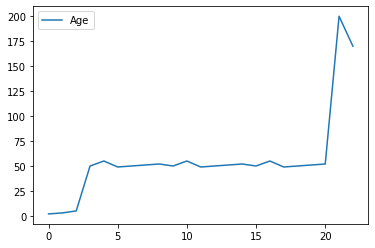

In [5]:
df.plot()

In [7]:
df.describe()

,Age
count,23.000000
mean,56.565217
std,43.972953
min,2.000000
25%,49.500000
50%,50.000000
75%,52.000000
max,200.000000


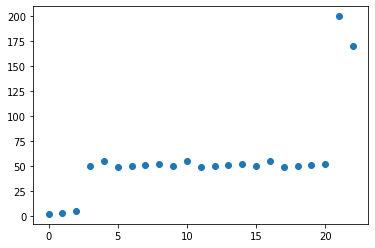

In [8]:
plt.scatter(np.arange(0,23),  df['Age'])

(array([ 3.,  0., 18.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  2. ,  21.8,  41.6,  61.4,  81.2, 101. , 120.8, 140.6, 160.4,
        180.2, 200. ]),
 <BarContainer object of 10 artists>)

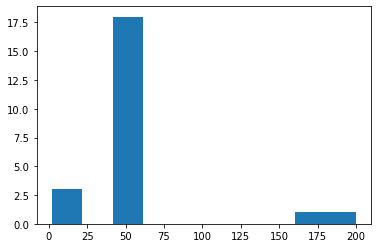

In [11]:
plt.hist(df['Age'],bins=10)

In [17]:
lower_bound = 0.1
upper_bound = 0.95
res = df['Age'].quantile([lower_bound, upper_bound])
res

0.10     13.8
0.95    158.5
Name: Age, dtype: float64

In [16]:
# Less than 13.8 we can ignore and , greater than 158.5 we can ignore

In [19]:
type(res)

pandas.core.series.Series

In [23]:
res[lower_bound]

13.800000000000008

In [24]:
res[upper_bound]

158.49999999999986

In [53]:
true_index = ((df.Age.values>res[lower_bound]) &   (df.Age.values<res[upper_bound]) )

In [35]:
type(df.Age)

pandas.core.series.Series

In [54]:
true_index

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [56]:
df[true_index]

,Age
3,50
4,55
5,49
6,50
7,51
8,52
9,50
10,55
11,49
12,50


In [58]:
false_index = ~true_index

In [59]:
df[false_index]

,Age
0,2
1,3
2,5
21,200
22,170


In [64]:
mean_age = df[true_index]['Age'].mean()
mean_age

51.166666666666664

In [69]:
df.loc[false_index, 'Age'] = mean_age

In [70]:
df

,Age
0,51.166667
1,51.166667
2,51.166667
3,50.000000
4,55.000000
5,49.000000
6,50.000000
7,51.000000
8,52.000000
9,50.000000


(array([3., 6., 0., 8., 0., 3., 0., 0., 0., 3.]),
 array([49. , 49.6, 50.2, 50.8, 51.4, 52. , 52.6, 53.2, 53.8, 54.4, 55. ]),
 <BarContainer object of 10 artists>)

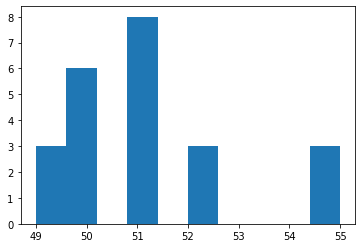

In [71]:
plt.hist(df['Age'])

In [72]:
df.to_csv('Age_data_outlierremoved.csv')